<a href="https://colab.research.google.com/github/shashvindu/Pyspark-ml/blob/main/ml/Advanced_Pyspark_for_Exploratory_Data_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Initialize pyspark framework and load data into pyspark's dataframe\:**

In [ ]:
!apt-get install openjdk-8-jdk-headless -qq > /dev/null
!wget -q https://dlcdn.apache.org/spark/spark-3.3.0/spark-3.3.0-bin-hadoop3.tgz
!tar xf spark-3.3.0-bin-hadoop3.tgz
!pip install -q findspark
!pip install pyspark


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 281.3 MB 48 kB/s 
     |████████████████████████████████| 199 kB 44.4 MB/s 
  Created wheel for pyspark: filename=pyspark-3.3.0-py2.py3-none-any.whl size=281764026 sha256=fc74aaf677fdb7505ebdc1dbeb640cffdec4d1ef2fad4d7ce90b77524887bf76
  Stored in directory: /root/.cache/pip/wheels/7a/8e/1b/f73a52650d2e5f337708d9f6a1750d451a7349a867f928b885
Successfully built pyspark


In [ ]:
# Import other modules not related to PySpark
import os
import sys
import pandas as pd
from pandas import DataFrame
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import matplotlib
from mpl_toolkits.mplot3d import Axes3D
import math
from IPython.core.interactiveshell import InteractiveShell
from datetime import *
import statistics as stats
# This helps auto print out the items without explixitly using 'print'
InteractiveShell.ast_node_interactivity = "all" 
%matplotlib inline

In [ ]:
# Import PySpark related modules
import pyspark
from pyspark.rdd import RDD
from pyspark.sql import Row
from pyspark.sql import DataFrame
from pyspark.sql import SparkSession
from pyspark.sql import SQLContext
from pyspark.sql import functions
from pyspark.sql.functions import lit, desc, col, size, array_contains\
, isnan, udf, hour, array_min, array_max, countDistinct
from pyspark.sql.types import *

MAX_MEMORY = '15G'
# Initialize a spark session.
conf = pyspark.SparkConf().setMaster("local[*]") \
        .set('spark.executor.heartbeatInterval', 10000) \
        .set('spark.network.timeout', 10000) \
        .set("spark.core.connection.ack.wait.timeout", "3600") \
        .set("spark.executor.memory", MAX_MEMORY) \
        .set("spark.driver.memory", MAX_MEMORY)
def init_spark():
    spark = SparkSession \
        .builder \
        .appName("Pyspark guide") \
        .config(conf=conf) \
        .getOrCreate()
    return spark

spark = init_spark()
filename_data = '/content/drive/MyDrive/endomondoHR.json'
# Load the main data set into pyspark data frame 
df = spark.read.json(filename_data, mode="DROPMALFORMED")
print('Data frame type: ' + str(type(df)))

Data frame type: <class 'pyspark.sql.dataframe.DataFrame'>


**Overview of Dataset **

---
Schema, columns & datatypes of the data set:

The data set has both single value columns (int, string) and columns made of arrays/list.

In [ ]:
print('Data overview')
df.printSchema()

Data overview
root
 |-- altitude: array (nullable = true)
 |    |-- element: double (containsNull = true)
 |-- gender: string (nullable = true)
 |-- heart_rate: array (nullable = true)
 |    |-- element: long (containsNull = true)
 |-- id: long (nullable = true)
 |-- latitude: array (nullable = true)
 |    |-- element: double (containsNull = true)
 |-- longitude: array (nullable = true)
 |    |-- element: double (containsNull = true)
 |-- speed: array (nullable = true)
 |    |-- element: double (containsNull = true)
 |-- sport: string (nullable = true)
 |-- timestamp: array (nullable = true)
 |    |-- element: long (containsNull = true)
 |-- url: string (nullable = true)
 |-- userId: long (nullable = true)



In [ ]:
print('Columns overview')
pd.DataFrame(df.dtypes, columns = ['Column Name','Data type'])

Columns overview


,Column Name,Data type
0,altitude,array<double>
1,gender,string
2,heart_rate,array<bigint>
3,id,bigint
4,latitude,array<double>
5,longitude,array<double>
6,speed,array<double>
7,sport,string
8,timestamp,array<bigint>
9,url,string


In [ ]:
df.show(2)

+--------------------+------+--------------------+---------+--------------------+--------------------+--------------------+-----+--------------------+--------------------+--------+
|            altitude|gender|          heart_rate|       id|            latitude|           longitude|               speed|sport|           timestamp|                 url|  userId|
+--------------------+------+--------------------+---------+--------------------+--------------------+--------------------+-----+--------------------+--------------------+--------+
|[41.6, 40.6, 40.6...|  male|[100, 111, 120, 1...|396826535|[60.1733487658202...|[24.6497704088687...|[6.8652, 16.4736,...| bike|[1408898746, 1408...|https://www.endom...|10921915|
|[38.4, 39.0, 39.0...|  male|[100, 105, 111, 1...|392337038|[60.1732475962489...|[24.6498552337288...|[9.0792, 13.284, ...| bike|[1408221682, 1408...|https://www.endom...|10921915|
+--------------------+------+--------------------+---------+--------------------+--------------

In [ ]:
print('Data frame describe (string and numeric columns only):')
df.describe().toPandas()

Data frame describe (string and numeric columns only):


,summary,gender,id,sport,url,userId
0,count,253020,253020,253020,253020,253020
1,mean,None,3.566244412926132E8,None,None,4619648.939783417
2,stddev,None,1.574845634895318E8,None,None,3932877.7296880507
3,min,female,99296,aerobics,https://www.endomondo.com/users/10014612/worko...,69
4,max,unknown,674008008,yoga,https://www.endomondo.com/users/9991401/workou...,15481421


In [ ]:
print(f'There are total {df.count()} row, Let print first 2 data rows:')
df.limit(2).toPandas()

There are total 253020 row, Let print first 2 data rows:


,altitude,gender,heart_rate,id,latitude,longitude,speed,sport,timestamp,url,userId
0,"[41.6, 40.6, 40.6, 38.4, 37.0, 34.0, 34.0, 34....",male,"[100, 111, 120, 119, 120, 116, 125, 128, 131, ...",396826535,"[60.173348765820265, 60.173239801079035, 60.17...","[24.64977040886879, 24.65014273300767, 24.6509...","[6.8652, 16.4736, 19.1988, 20.4804, 31.3956, 3...",bike,"[1408898746, 1408898754, 1408898765, 140889877...",https://www.endomondo.com/users/10921915/worko...,10921915
1,"[38.4, 39.0, 39.0, 38.2, 36.8, 36.8, 36.8, 35....",male,"[100, 105, 111, 110, 108, 115, 126, 130, 132, ...",392337038,"[60.173247596248984, 60.17320962622762, 60.172...","[24.649855233728886, 24.65015547350049, 24.650...","[9.0792, 13.284, 15.9336, 10.9476, 16.1676, 30...",bike,"[1408221682, 1408221687, 1408221699, 140822170...",https://www.endomondo.com/users/10921915/worko...,10921915


In [ ]:
df.count()

253020

***Detect missing values and abnormal zeroes***
-----------
After having a first sight of the columns, the first thing we should check is if the data set having any missing value.

For string columns, we check for None and null

For numeric columns, we check for zeroes and NaN

For array type columns, we check if the array contain zeroes or NaN

In [ ]:
print('Columns overview')
pd.DataFrame(df.dtypes, columns = ['Column Name','Data type'])

Columns overview


,Column Name,Data type
0,altitude,array<double>
1,gender,string
2,heart_rate,array<bigint>
3,id,bigint
4,latitude,array<double>
5,longitude,array<double>
6,speed,array<double>
7,sport,string
8,timestamp,array<bigint>
9,url,string


In [ ]:
string_columns = ['gender', 'sport', 'url']
numeric_columns = ['id','userId']
array_columns = ['altitude', 'heart_rate', 'latitude', 'longitude', 'speed', 'timestamp']
missing_values = {} 

In [ ]:
for index, column in enumerate(df.columns):
    if column in string_columns:    # check string columns with None and Null values
#         missing_count = df.filter(col(column).eqNullSafe(None) | col(column).isNull()).count()
#         missing_values.update({column: missing_count})
        missing_count = df.filter(col(column).eqNullSafe(None) | col(column).isNull()).count()
        missing_values.update({column:missing_count})
    if column in numeric_columns:  # check zeroes, None, NaN
        missing_count = df.where(col(column).isin([0,None,np.nan])).count()
        missing_values.update({column:missing_count})
    if column in array_columns:  # check zeros and NaN
        missing_count = df.filter(array_contains(df[column], 0) | array_contains(df[column], np.nan)).count()
        missing_values.update({column:missing_count})
missing_df = pd.DataFrame.from_dict([missing_values])
missing_df

,altitude,gender,heart_rate,id,latitude,longitude,speed,sport,timestamp,url,userId
0,40848,0,1280,0,113,113,7741,0,0,0,0


In [ ]:
# We create new column to count the number of timestamps recorded per row/workout, named as 'PerWorkoutRecordCount' column
df = df.withColumn('PerWorkoutRecordCount', size(col('timestamp')))

In [ ]:
df.show()

+--------------------+------+--------------------+---------+--------------------+--------------------+--------------------+----------------+--------------------+--------------------+--------+---------------------+
|            altitude|gender|          heart_rate|       id|            latitude|           longitude|               speed|           sport|           timestamp|                 url|  userId|PerWorkoutRecordCount|
+--------------------+------+--------------------+---------+--------------------+--------------------+--------------------+----------------+--------------------+--------------------+--------+---------------------+
|[41.6, 40.6, 40.6...|  male|[100, 111, 120, 1...|396826535|[60.1733487658202...|[24.6497704088687...|[6.8652, 16.4736,...|            bike|[1408898746, 1408...|https://www.endom...|10921915|                  500|
|[38.4, 39.0, 39.0...|  male|[100, 105, 111, 1...|392337038|[60.1732475962489...|[24.6498552337288...|[9.0792, 13.284, ...|            bike|[140

In [18]:
# This part is writen as a function to be used again later
def user_activity_workout_summarize(df):
    user_count = format(df.select('userId').distinct().count(), ',d')
    workout_count = format(df.select('id').distinct().count(), ',d')
    activity_count = str(df.select('sport').distinct().count())
    sum_temp = df.agg(functions.sum('PerWorkoutRecordCount')).toPandas()
    total_records_count = format(sum_temp['sum(PerWorkoutRecordCount)'][0],',d')
    columns=['Users count', 'Activity types count','Workouts count', 'Total records count']
    data = [[user_count], [activity_count], [workout_count], [total_records_count]]
    sum_dict = {column: data[i] for i, column in enumerate(columns)}
    sum_df = pd.DataFrame.from_dict(sum_dict)[columns]
    gender_user_count = df.select('gender','userId').distinct().groupBy('gender').count().toPandas()
    gender_activities_count = df.groupBy('gender').count().toPandas()
    gender_user_activity_count = gender_user_count.join(
        gender_activities_count.set_index('gender'), on='gender'
        , how='inner', lsuffix='_gu'
    )
    gender_user_activity_count.columns = ['Gender', '# of users', 'Activities (workouts) count']
    
    return sum_df, gender_user_activity_count

In [19]:
sum_dfs= user_activity_workout_summarize(df)
print('\nOverall data set summary on users, workouts and number of records (pre-filtering):')
sum_dfs[0]


Overall data set summary on users, workouts and number of records (pre-filtering):


,Users count,Activity types count,Workouts count,Total records count
0,"1,104",49,"253,020","111,541,956"


**Pyspark lazy evaluation**

In [20]:
ranked_sport_users_df = df.select(df.sport, df.userId) \
    .distinct() \
    .groupBy(df.sport) \
    .count() \
    .orderBy("count", ascending=False)

In [21]:
# Top 5 workout types
highest_sport_users_df = ranked_sport_users_df.limit(5).toPandas()
highest_sport_users_df

,sport,count
0,run,865
1,bike,794
2,mountain bike,336
3,bike (transport),252
4,walk,209


In [22]:
highest_sport_users_df.rename(columns = {'count':'Users count'}, inplace = True)

In [23]:
highest_sport_users_df

,sport,Users count
0,run,865
1,bike,794
2,mountain bike,336
3,bike (transport),252
4,walk,209


In [24]:
total_sports_users = ranked_sport_users_df.groupBy().sum().collect()[0][0]
total_sports_users

3442

**Explolatory Data analysis**

In [25]:
ranked_sport_users_df.collect()[:5]

[Row(sport='run', count=865),
 Row(sport='bike', count=794),
 Row(sport='mountain bike', count=336),
 Row(sport='bike (transport)', count=252),
 Row(sport='walk', count=209)]

Top 5 sports that have the most users participated:


,sport,Users count,percentage
0,run,865,25.130738
1,bike,794,23.067984
2,mountain bike,336,9.761766
3,bike (transport),252,7.321325
4,walk,209,6.072051
5,others,986,28.646136


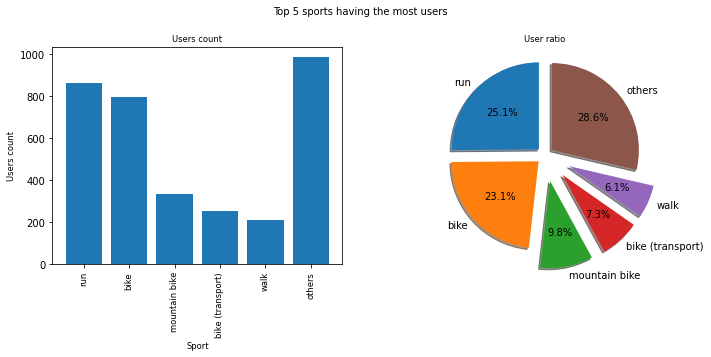

In [26]:
highest_sport_users_df_renamed = highest_sport_users_df
# Compute the percentage of top 5 workout type / total users
highest_sport_users_df_renamed['percentage'] = highest_sport_users_df['Users count'] \
    / total_sports_users * 100

# We assign the rest of users belong to another specific group that we call 'others'
others = {
      'sport': 'others'
    , 'Users count': total_sports_users - sum(highest_sport_users_df_renamed['Users count'])
    , 'percentage': 100 - sum(highest_sport_users_df_renamed['percentage'])
}

highest_sport_users_df_renamed = highest_sport_users_df_renamed.append(
    others, ignore_index=True
)
print('Top 5 sports that have the most users participated:')
highest_sport_users_df_renamed

fig, axs = plt.subplots(nrows=1, ncols=2, figsize=plt.figaspect(0.35))

plot0 =   axs[0].bar(x=highest_sport_users_df_renamed['sport']
                     , height=highest_sport_users_df_renamed['Users count'])
title0 =  axs[0].set_title('Users count', fontsize = 'small')
xlabel0 = axs[0].set_xlabel('Sport', fontsize = 'small')
ylabel0 = axs[0].set_ylabel('Users count', fontsize = 'small')
xsticks_label = axs[0].set_xticklabels(highest_sport_users_df_renamed['sport'] 
                                       ,rotation = 'vertical', fontsize='small')
explode = (0.1, 0.1, 0.3, 0.3, 0.3, 0.1)
title1 = axs[1].set_title('User ratio', fontsize = 'small')
plot1 = axs[1].pie(
      x=highest_sport_users_df_renamed['percentage']
    , labels=highest_sport_users_df_renamed['sport']
    , autopct='%1.1f%%', shadow=True, explode=explode, startangle=90
    , radius=1
)

text = fig.text(0.5, 1.02, 'Top 5 sports having the most users', ha='center', va='top', transform=fig.transFigure)

In [27]:
# Let quick overview activities by gender
# we have something like this
activities_by_gender = df.groupBy('sport', 'gender').count().toPandas() 
activities_by_gender[:5]

,sport,gender,count
0,hiking,female,71
1,core stability training,male,1103
2,run,male,107882
3,kayaking,male,253
4,mountain bike,male,12782


In [28]:
activities_by_gender

,sport,gender,count
0,hiking,female,71
1,core stability training,male,1103
2,run,male,107882
3,kayaking,male,253
4,mountain bike,male,12782
...,...,...,...
85,wheelchair,male,1
86,rugby,male,7
87,windsurfing,male,1
88,beach volleyball,male,2


**UNSTACK PYSPARK** **DATAFRAME**

There are total: 49 activities and here is the chart for activities based on gender:


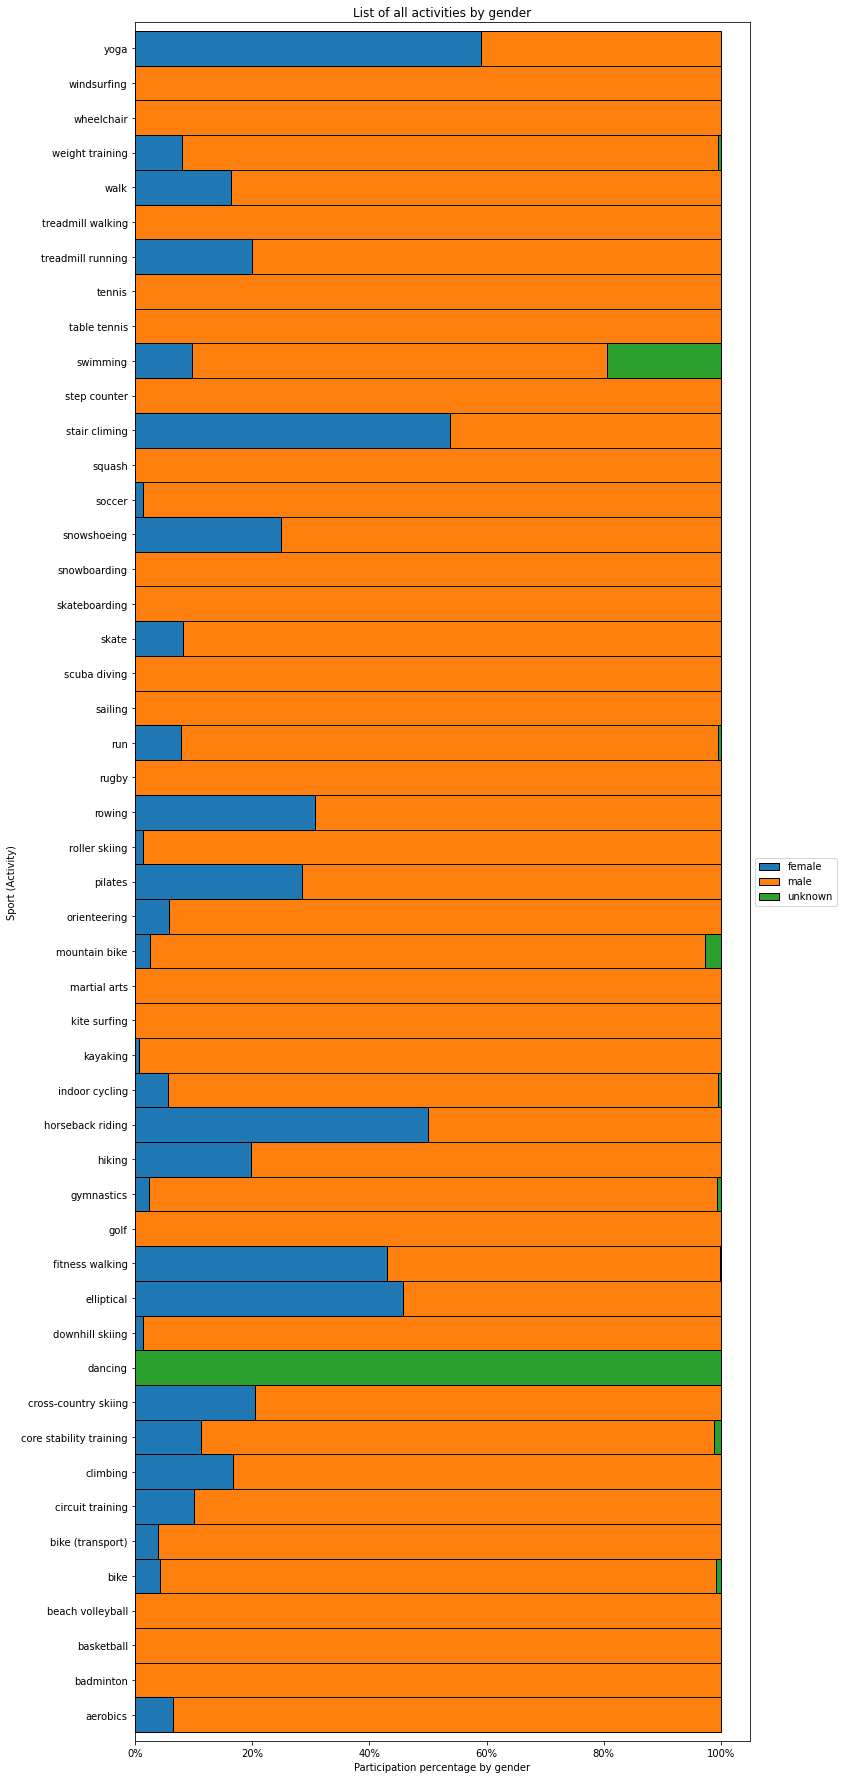

In [30]:
total_activities = ranked_sport_users_df.count()
print(f'There are total: {total_activities} activities and here is the chart for activities based on gender:')
# Add the infor of activities based on gender
activities_by_gender = df.groupBy('sport', 'gender').count().toPandas()
# Visualize
fig = plt.figure(figsize=(12, 25))
grid_size = (1,1);
ax = plt.subplot2grid(grid_size, (0,0), colspan=1, rowspan=1)
plot = activities_by_gender.groupby(['sport', 'gender']).agg(np.mean).groupby(level=0).apply(
    lambda x: 100 * x / x.sum()).unstack().plot(kind='barh', stacked=True, width=1  ## APPLY UNSTACK TO RESHAPE DATA
                , edgecolor='black', ax=ax, title='List of all activities by gender')
ylabel = plt.ylabel('Sport (Activity)');
xlabel = plt.xlabel('Participation percentage by gender');
legend = plt.legend(
    sorted(activities_by_gender['gender'].unique()), loc='center left', bbox_to_anchor=(1.0, 0.5)
)
param_update = plt.rcParams.update({'font.size': 16});
ax = plt.gca()
formatter = ax.xaxis.set_major_formatter(mtick.PercentFormatter());
a = fig.tight_layout()
plt.show()

,sport,female,male,unknown,total,percentage
0,run,9360,107882,660,117902,46.597897
1,bike,4172,92966,863,98001,38.732511
2,mountain bike,353,12782,375,13510,5.339499
3,bike (transport),414,10030,1,10445,4.128132
5,others,1034,8255,42,9331,3.687851
4,walk,626,3204,1,3831,1.514110


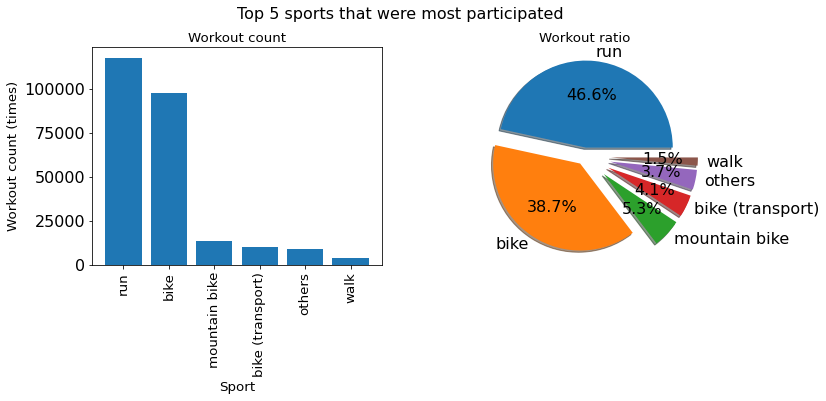

In [31]:
activities_by_gender_df = activities_by_gender.pivot_table(
    index="sport", columns="gender", values='count', fill_value=0) \
    .reset_index().rename_axis(None, axis=1)

activities_by_gender_df['total'] = activities_by_gender_df['male'] \
        + activities_by_gender_df['female'] \
        + activities_by_gender_df['unknown']
activities_by_gender_df['percentage'] = activities_by_gender_df['total'] \
    / sum(activities_by_gender_df['total']) * 100
top_activities_by_gender_df = activities_by_gender_df.sort_values(
    by='percentage', ascending=False
).head(5)

others = {'sport' : 'others'}
for column in ['female', 'male', 'unknown', 'total', 'percentage']:
    value = sum(activities_by_gender_df[column]) - sum(top_activities_by_gender_df[column])
    others.update({column: value})
top_activities_by_gender_df = top_activities_by_gender_df.append(others, ignore_index=True)
top_activities_by_gender_df = top_activities_by_gender_df.sort_values(
    by='percentage', ascending=False
)
top_activities_by_gender_df

fig, axs = plt.subplots(nrows=1, ncols=2, figsize=plt.figaspect(0.35))

plot0 = axs[0].bar(x=top_activities_by_gender_df['sport']
                   , height=top_activities_by_gender_df['total'])
title0 = axs[0].set_title('Workout count', fontsize='small')
xlabel0 = axs[0].set_xlabel('Sport', fontsize='small')
ylabel0 = axs[0].set_ylabel('Workout count (times)', fontsize='small')
xsticks_label = axs[0].set_xticklabels(top_activities_by_gender_df['sport']
                                       , rotation='vertical', fontsize='small')
explode = (0.1, 0.1, 0.3, 0.3, 0.3, 0.3)
title1 = axs[1].set_title('Workout ratio', fontsize = 'small')
plot1 = axs[1].pie(
    x=top_activities_by_gender_df['percentage']
    , labels=top_activities_by_gender_df['sport']
    , autopct='%1.1f%%', shadow=True, explode=explode, radius=1
)

text = fig.text(0.5, 1.02, 'Top 5 sports that were most participated'
                , ha='center', va='top', transform=fig.transFigure)

In [32]:
min_number_of_sports = 1

sport_df = df \
    .select(df.userId, df.gender, df.sport) \
    .distinct() \
    .groupBy(df.userId, df.gender) \
    .count()    

user_more_sports_df = sport_df \
                    .filter(sport_df["count"] > min_number_of_sports) \
                    .orderBy("count", ascending = False) \
                    .toPandas()
user_more_sports_df.rename(columns = {'count':'Sports count'}, inplace = True)
user_more_sports_df.describe().astype(int).T

,count,mean,std,min,25%,50%,75%,max
userId,822,4860464,3953412,69,1609606,3730685,7554937,15481421
Sports count,822,3,2,2,2,3,5,16


/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


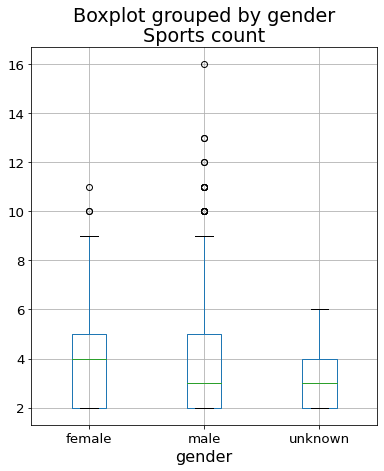

In [33]:
plot = user_more_sports_df.boxplot(column='Sports count', by='gender', fontsize='small', figsize=(6,7))


Plot of workouts distribution by activity type:


/usr/local/lib/python3.7/dist-packages/pandas/plotting/_matplotlib/hist.py:428: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  **kwds,


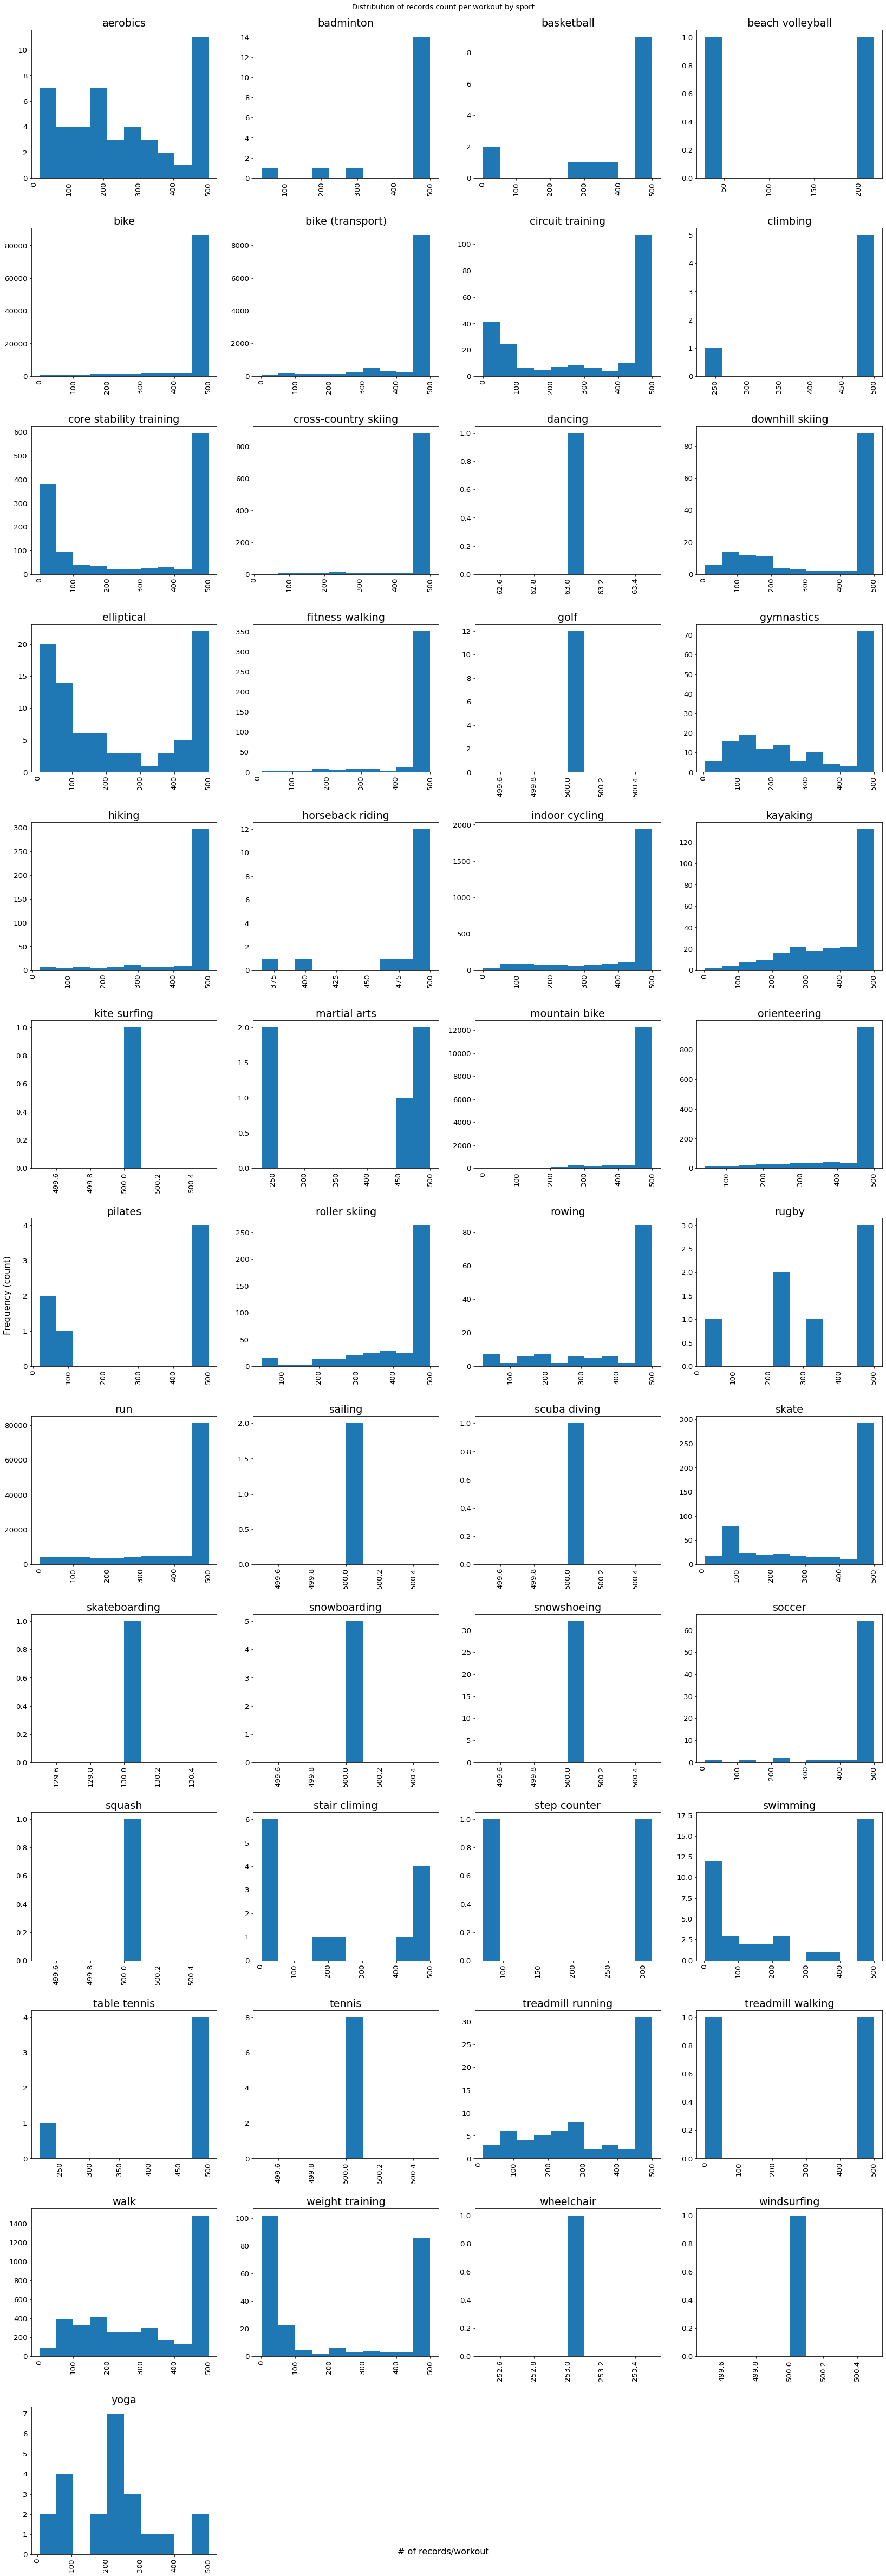

In [34]:
print('\nPlot of workouts distribution by activity type:')
plot_size_x, plot_size_y = 5, 5
figsize_x, figsize_y = plot_size_x * 4 + 3, plot_size_y * 13 + 1
figsize=(figsize_x, figsize_y)
fig = plt.figure(figsize=figsize) #
grid_size = (13,4)
ax = plt.subplot2grid(grid_size, (0,0), colspan=1, rowspan=1)
#fig, ax = plt.subplots()
PerWorkoutRecordCount_dist = df.select('PerWorkoutRecordCount', 'sport').toPandas().hist(
    column='PerWorkoutRecordCount', bins=10, sharex = False, grid=True
    , xlabelsize='small', ylabelsize='small', by='sport', ax = ax
    , layout = grid_size, figsize=figsize
    )
a = fig.tight_layout()
title = fig.text(0.5, 1, 'Distribution of records count per workout by sport', ha='center' 
         , fontsize='small', transform=fig.transFigure);
xlabel = fig.text(
    0.5, 0.01, '# of records/workout', va='bottom', ha='center', transform=fig.transFigure
)
ylabel = fig.text(0.01, 0.5, 'Frequency (count)', va='center', rotation='vertical');

In [35]:
# Filter df with at least 10 records (as we are assumming if any user_id with less then 10 record would not be meaningful)
qualified_df = df \
    .select(df.sport, df.userId, df.gender) \
    .groupBy(df.sport, df.userId, df.gender) \
    .count()
qualified_df = qualified_df.filter(qualified_df["count"] >= 10) \
    .orderBy("count", ascending = False)

In [36]:
print('Number of users having more than 10 workouts:')
qualified_pd_df = qualified_df.select("userId", "gender").distinct() \
    .groupBy(qualified_df.gender).count().toPandas()
qualified_pd_df.rename(columns={'count': 'Users count'}, inplace=True)
qualified_pd_df
qualified_users_count = sum(qualified_pd_df['Users count'])
total_users_count = df.select('userId').distinct().count()
qualified_percentage = round((qualified_users_count / total_users_count),2) * 100
print('\nSo there is {} / {} of users qualifying the 10 historical records criteria, which is {:.2f}%' \
      .format(qualified_users_count, total_users_count, qualified_percentage)
     )

Number of users having more than 10 workouts:


,gender,Users count
0,unknown,13
1,female,88
2,male,886



So there is 987 / 1104 of users qualifying the 10 historical records criteria, which is 89.00%


**Pyspark UDF Registering**

In [37]:
# LOOK AGAIN THE TIMESTAMP COLUMN
df.limit(3).toPandas()

,altitude,gender,heart_rate,id,latitude,longitude,speed,sport,timestamp,url,userId,PerWorkoutRecordCount
0,"[41.6, 40.6, 40.6, 38.4, 37.0, 34.0, 34.0, 34....",male,"[100, 111, 120, 119, 120, 116, 125, 128, 131, ...",396826535,"[60.173348765820265, 60.173239801079035, 60.17...","[24.64977040886879, 24.65014273300767, 24.6509...","[6.8652, 16.4736, 19.1988, 20.4804, 31.3956, 3...",bike,"[1408898746, 1408898754, 1408898765, 140889877...",https://www.endomondo.com/users/10921915/worko...,10921915,500
1,"[38.4, 39.0, 39.0, 38.2, 36.8, 36.8, 36.8, 35....",male,"[100, 105, 111, 110, 108, 115, 126, 130, 132, ...",392337038,"[60.173247596248984, 60.17320962622762, 60.172...","[24.649855233728886, 24.65015547350049, 24.650...","[9.0792, 13.284, 15.9336, 10.9476, 16.1676, 30...",bike,"[1408221682, 1408221687, 1408221699, 140822170...",https://www.endomondo.com/users/10921915/worko...,10921915,500
2,"[76.4, 73.2, 72.4, 73.0, 73.0, 70.8, 69.2, 69....",male,"[99, 105, 113, 110, 109, 110, 108, 121, 116, 1...",389643739,"[60.17326201312244, 60.173205351457, 60.172969...","[24.64995657093823, 24.650197718292475, 24.651...","[4.0464, 13.8204, 16.9776, 19.9404, 28.7856, 3...",bike,"[1407858459, 1407858466, 1407858478, 140785849...",https://www.endomondo.com/users/10921915/worko...,10921915,500


We create 4 helper function for 'timestamp' column as described above then convert them to UDF

In [38]:
# Convert a timestamp column into Datetime.Datetime, to be used for .withColumn function later
def to_time(timestamp_list):
    # convert to datetime and minus 7 hours due to the difference in Endomondo time window with utc time as the dataset description
    return [datetime.fromtimestamp(t) - timedelta(hours=7) for t in timestamp_list]

# Register 'to_time' function into UDF pyspark framework
udf_to_time = udf(to_time, ArrayType(elementType=TimestampType()))

# Support function to get the duration (in minutes) of a list of datetime values, to be used for withColumn function later
def get_duration(datetime_list):
    time_dif = max(datetime_list) - min(datetime_list)
    return time_dif.seconds/60

# Register the support function 'get_duration' as a user defined function into pyspark framework
udf_get_duration = udf(get_duration, FloatType())

# Support function to get the workout start time of the datetime list, to be used for withColumn function later
def get_start_time(datetime_list):
    return min(datetime_list)

# Register the support function 'get_start_time' as a user defined function into pyspark framework
udf_get_start_time = udf(get_start_time, TimestampType())

# Support function to get list of intervals within a workout
def get_interval(datetime_list):
    if len(datetime_list) == 1:
        return [0]
    else:
        interval_list = []
        for i in range(0, len(datetime_list)-1):
            interval = (datetime_list[i+1] - datetime_list[i]).seconds
            interval_list.append(interval)
        return interval_list

# Register the support function 'get_interval' as a user defined function into pyspark framework    
udf_get_interval = udf(get_interval, ArrayType(elementType=IntegerType()))

# Create new 'date_time' column to convert from timestamp into python's datetime format for later usage
df = df.withColumn('date_time', 
    udf_to_time('timestamp'))

# Create 'workout_start_time' column to get the start time of each workout/row:
df = df.withColumn('workout_start_time', hour(udf_get_start_time('date_time')))

# Create duration column from the date_time column just created, using the udf function udf_get_duration defined above
df = df.withColumn('duration', udf_get_duration('date_time'))

# Create interval column from the date_time column, using the udf function udf_get_interval defined above
df = df.withColumn('interval', udf_get_interval('date_time'))

print('New columns (''date_time'', ''workout_start_time'' in hour\
, ''duration'' in minutes & ''interval'' in seconds)\n, first 5 rows:')
df.select('timestamp','date_time', 'workout_start_time', 'duration', 'interval').limit(5).toPandas()



New columns (date_time, workout_start_time in hour, duration in minutes & interval in seconds)
, first 5 rows:


,timestamp,date_time,workout_start_time,duration,interval
0,"[1408898746, 1408898754, 1408898765, 140889877...","[2014-08-24 09:45:46, 2014-08-24 09:45:54, 201...",9,126.483330,"[8, 11, 13, 16, 6, 23, 16, 23, 29, 23, 24, 24,..."
1,"[1408221682, 1408221687, 1408221699, 140822170...","[2014-08-16 13:41:22, 2014-08-16 13:41:27, 201...",13,74.000000,"[5, 12, 8, 4, 5, 6, 4, 4, 5, 13, 7, 17, 4, 10,..."
2,"[1407858459, 1407858466, 1407858478, 140785849...","[2014-08-12 08:47:39, 2014-08-12 08:47:46, 201...",8,112.483330,"[7, 12, 12, 16, 6, 7, 16, 11, 19, 13, 17, 11, ..."
3,"[1407432042, 1407432048, 1407432056, 140743206...","[2014-08-07 10:20:42, 2014-08-07 10:20:48, 201...",10,75.316666,"[6, 8, 9, 4, 13, 4, 3, 4, 13, 10, 13, 13, 7, 1..."
4,"[1406909434, 1406909436, 1406909437, 140690943...","[2014-08-01 09:10:34, 2014-08-01 09:10:36, 201...",9,22.616667,"[2, 1, 1, 3, 2, 1, 4, 2, 1, 2, 1, 1, 2, 4, 4, ..."


**Now, we look at the duration of each workout (in minutes). First is some typical statistics**

In [39]:
print('\nLet''s look at the statistics of the new duration column (in minutes):')
df.select('duration').toPandas().describe().T

,count,mean,std,min,25%,50%,75%,max
duration,253020.0,84.486427,98.093048,0.0,32.166668,58.916668,102.73333,1439.966675


In [ ]:

print('\nPlotting distribution of duration per sport type:')
plot_size_x, plot_size_y = 5, 5
figsize_x, figsize_y = plot_size_x * 4 +3, plot_size_y * 13 + 1
figsize = (figsize_x, figsize_y)
fig = plt.figure(figsize=figsize) #
grid_size = (13,4)
ax = plt.subplot2grid(grid_size, (0,0), colspan=1, rowspan=1)

duration_dist = df.select('duration', 'sport').toPandas().hist(
    column='duration', by='sport', bins=15, sharex = False, grid=True
    , xlabelsize='small', ylabelsize='small' , ax = ax
    , layout = grid_size, figsize=figsize
    )
a = fig.tight_layout()
title = fig.text(0.5, 1, 'Distribution of workout duration by sport'
             , ha='center', va='center', transform=fig.transFigure
            )
xlabel = fig.text(0.5, 0.01, 'Workout duration (minutes)'
             , ha='center', va='center', transform=fig.transFigure)
ylabel = fig.text(0.01, 0.5, 'Frequency (count)', va='center', rotation='vertical');


Plotting distribution of duration per sport type:


**Convert row objects to Spark Resilient Distributed Dataset (RDD)**

In [ ]:

#  Helper function to calculate statistic(s) of the column name from a tuple x of (sport, records list of the column)
#, the stats to calculate is also given as an input
def calculate_stats(x,column_name, stat_list):
    sport, records_list = x
    stat_dict = {'sport': sport}
    if 'min' in stat_list:
        min_stat = min(records_list)
        stat_dict.update({'min ' + column_name : min_stat})
    if 'max' in stat_list:
        max_stat = max(records_list)
        stat_dict.update({'max ' + column_name: max_stat})
    if 'mean' in stat_list:
        average_stat = stats.mean(records_list)
        stat_dict.update({'mean ' + column_name: average_stat})
    if 'stdev' in stat_list:
        std_stat = stats.stdev(records_list)
        stat_dict.update({'stdev ' + column_name: std_stat})
    if '50th percentile' in stat_list:
        median_stat = stats.median(records_list)
        stat_dict.update({'50th percentile ' + column_name: median_stat})
    if '25th percentile' in stat_list:
        percentile_25th_stat = np.percentile(records_list, 25)
        stat_dict.update({'25th percentile ' + column_name: percentile_25th_stat})
    if '75th percentile' in stat_list:
        percentile_75th_stat = np.percentile(records_list, 75)
        stat_dict.update({'75th percentile ' + column_name: percentile_75th_stat})
    if '95th percentile' in stat_list:
        percentile_95th_stat = np.percentile(records_list, 95)
        stat_dict.update({'95th percentile ' + column_name: percentile_95th_stat})
    return stat_dict

def to_list(a):
    return a

def extend(a, b):
    a.extend(b)
    return a

def retrieve_array_column_stat_df(df, column_name, stat_list):
    # Convert sport & "column_name" to RDD to easily calculate the statistics of intervals by sports
    sport_record_rdd = df.select('sport', column_name).rdd \
    .map(tuple).combineByKey(to_list, extend, extend).persist()

    # Calculate statistics of the input column by calling calculate_stats function defined above
    record_statistic_df = pd.DataFrame(sport_record_rdd.map(
        lambda x: calculate_stats(x, column_name,stat_list)).collect()
                                      )
    # Set proper dataframe column orders
    columns_order = ['sport'] + [stat + ' ' + column_name for stat in stat_list]
    # Re order columns
    return record_statistic_df[columns_order]

stat_list = ['min', '25th percentile', 'mean', '50th percentile',
                     '75th percentile', '95th percentile', 'max', 'stdev']
interval_statistic_df = retrieve_array_column_stat_df(df, column_name='interval', stat_list=stat_list)
print('\nLet\'s look at statistic for interval, in seconds (by sport):' )
interval_statistic_df



In [ ]:
print('\nSummarize statistics of interval sport:')
bar_columns = ['25th percentile interval', '50th percentile interval'
               , '75th percentile interval', '95th percentile interval']
line_columns1 = ['min interval', 'mean interval'] 
line_columns2 = ['max interval', 'stdev interval'] 
interval_statistic_df = interval_statistic_df.sort_values(
    by='95th percentile interval', ascending=False
)
figsize=(13, 59)
fig, axs = plt.subplots(nrows=7, figsize=figsize)

d = axs[0].set_title('Interval statistics by sport', fontsize=18)
for i in range (7):
    interval_statistic_sub_df = interval_statistic_df.iloc[i*7:i*7+7,]
    #interval_statistic_sub_df
    plot1 = interval_statistic_sub_df[['sport'] + bar_columns] \
        .groupby(['sport']).agg(np.mean).plot(
        kind='bar', stacked=True, grid=False, alpha=0.5, edgecolor='black', ax=axs[i], 
    )
    plot2 = interval_statistic_sub_df[['sport'] + line_columns1].plot(x='sport', ax=axs[i], marker='o')
    ax2 = axs[i].twinx()
    plot3 = interval_statistic_sub_df[['sport'] + line_columns2].plot( x='sport', ax=ax2, marker='o', color=['m', 'g'])
    a = axs[i].legend(loc='center left', fontsize=16, bbox_to_anchor=(1.2, 0.5), frameon=False)
    a = ax2.legend(  labels=['max interval (right)', 'stdev interval (right)']
                   , loc="center left", fontsize=16, bbox_to_anchor=(1.2, 0.11), frameon=False)
    b = axs[i].set_xticklabels(interval_statistic_sub_df['sport'],rotation = 'horizontal', fontsize='small')
    c = axs[i].set_xlabel('Sport (Activity)', fontsize='small');
    d = axs[i].set_ylabel('Quantiles Statistics + min/mean\n(second)', fontsize=16);
    e = ax2.set_ylabel('Max/stdev Statistics\n(second)', fontsize=16)
    for tick in axs[i].yaxis.get_major_ticks():
        a = tick.label.set_fontsize(16) 
    ax2.tick_params(axis='y', labelsize=16)
    b = plt.setp([a.get_xticklabels() for a in fig.axes[:-1]], visible=True)

plt.subplots_adjust(hspace=0.2)
plt.show();


**Workout start time**

In [ ]:
# Retrive the table of gender, sport and workout_start_time for plotting
start_time_df = df.select('gender', 'sport','workout_start_time').toPandas()

In [ ]:
activities = start_time_df['sport'].unique()
plot_size_x, plot_size_y = 5, 5
figsize_x, figsize_y = (plot_size_x + 0.5) * 4 +3, (plot_size_y + 1) * 13 + 1


nrows, ncols = 13, 4
a = fig.subplots_adjust(hspace = 1, wspace = 1)
fig, axs = plt.subplots(nrows=nrows, ncols=ncols, figsize=(figsize_x, figsize_y))
print('\nPlotting distribution of workout start time per sport type, break down by gender:')
a = plt.setp(axs, xticks=[0, 4, 8, 12, 16, 20])
for index, sport in enumerate(activities):
    row_index, col_index = divmod(index, ncols)
    male_start_time_list = start_time_df[(start_time_df.sport == sport) & 
                                            (start_time_df.gender == 'male')]['workout_start_time']
    female_start_time_list = start_time_df[(start_time_df.sport == sport) & 
                                            (start_time_df.gender == 'female')]['workout_start_time']
    unknown_start_time_list = start_time_df[(start_time_df.sport == sport) & 
                                            (start_time_df.gender == 'unknown')]['workout_start_time']
    if len(male_start_time_list) > 0:
        male_dist = axs[row_index, col_index].hist(male_start_time_list,
                                      bins = 12, alpha=0.5, label='male', range=(0, 23))
    if len(female_start_time_list) > 0:    
        female_dist = axs[row_index, col_index].hist(female_start_time_list,
                                      bins = 12, alpha=0.5, label='female', range=(0, 23))
    if len(unknown_start_time_list) > 0:
        unknown_dist = axs[row_index, col_index].hist(unknown_start_time_list,
                                      bins = 12, alpha=0.5, label = 'unknown', range=(0, 23))
    b= axs[row_index, col_index].set_title('Activitiy: ' + sport, fontsize='small')
    a = axs[row_index, col_index].legend(loc="upper left", fontsize='small')
    a = plt.setp(axs[row_index, col_index].get_xticklabels(), fontsize='small')

for i in range(1,4):
    x = axs[12, i].set_visible(False)
a = fig.tight_layout()
z = fig.text(0.5, 1, 'Distribution of workout started time (hour) by sport'
             , ha='center', va='top', transform=fig.transFigure)
y = fig.text(0.5, 0.01, 'Workout started hour in a day (hour)'
             , ha='center', va='bottom', transform=fig.transFigure)
z = fig.text(0.02, 0.5, 'Frequency (count)', va='center', rotation='vertical');

**Look deeper into row level information**

In [ ]:
stat_list = ['min', '25th percentile', 'mean', '95th percentile', 'max', 'stdev']
heart_rate_statistic_df = retrieve_array_column_stat_df(df, column_name='heart_rate', stat_list=stat_list)

In [ ]:
# Support function helping to sample data
def sampling_data(max_users_per_gender, max_workouts_per_sport):
    '''
        max_users_per_gender: maximum number of user to be selected randomly per gender
        max_workouts_per_sport: maximum number of activities to be selected per sport 
        (the sports existing in selected users)
    '''
    # Get unique list of userId and gender, for sampling purpose
    users_genders = df.select('userId', 'gender').distinct().toPandas()
    # Use 'sample' function to pick up to 3 userId per gender from the unique userId list
    random_x_users_per_gender = users_genders.groupby('gender')['userId'].apply(
                lambda s: s.sample(min(len(s), max_users_per_gender))
    )

    # Apply filter on the main pyspark dataframe for sampling
    samples_by_gender = df.where(df.userId.isin(list(random_x_users_per_gender)))

    # Next, generate the unique activity ids and sport types list from the sampled data set 
    workout_sports = samples_by_gender.select('id', 'sport').distinct().toPandas()
    # Use 'sample' function to pick up to 10 activity ids for each kind of sport 
    random_y_workouts_per_sport = workout_sports.groupby('sport')['id'].apply(
        lambda s: s.sample(min(len(s), max_workouts_per_sport))
    )

    # Apply filter to the sampled dataset to continue reduce the number of workouts per activity type
    samples_by_gender_and_sport = samples_by_gender.where(df.id.isin(list(random_y_workouts_per_sport)))
    return samples_by_gender_and_sport

In [ ]:
# Use 2 variable to determine the sampling criteria: 
# maximum users per gender and maximum workouts per sport
max_users_per_gender, max_workouts_per_sport = 20, 15

# Collect the sampled data set to Pandas to be used with plot features
pd_df = sampling_data(max_users_per_gender, max_workouts_per_sport).toPandas()
print('\nSampled data overview (only string and numeric columns):')
pd_df.describe(